In [6]:
import numpy as np
import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
%matplotlib inline

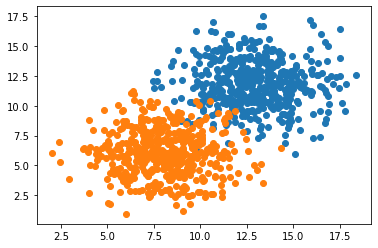

In [7]:
n_pts = 500
np.random.seed(0)
Xa = np.array([np.random.normal(13, 2, n_pts),
               np.random.normal(12, 2, n_pts)]).T
Xb = np.array([np.random.normal(8, 2, n_pts),
               np.random.normal(6, 2, n_pts)]).T
 
X = np.vstack((Xa, Xb))
y = np.matrix(np.append(np.zeros(n_pts), np.ones(n_pts))).T
 
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

In [8]:
model = Sequential()
model.add(Dense(units=1, input_shape=(2,), activation='sigmoid'))
adam=Adam(lr = 0.1 )
model.compile(adam, loss='binary_crossentropy', metrics=['accuracy'])
h=model.fit(x=X, y=y, verbose=1, batch_size=50,epochs=500, shuffle='true')

Epoch 1/500
20/20 [==============================] - 0s 4ms/step - loss: 2.4784 - accuracy: 0.4560
Epoch 2/500
20/20 [==============================] - 0s 2ms/step - loss: 1.1217 - accuracy: 0.4480
Epoch 3/500
20/20 [==============================] - 0s 2ms/step - loss: 0.6408 - accuracy: 0.6580
Epoch 4/500
20/20 [==============================] - 0s 2ms/step - loss: 0.4395 - accuracy: 0.8350
Epoch 5/500
20/20 [==============================] - 0s 2ms/step - loss: 0.3879 - accuracy: 0.8740
Epoch 6/500
20/20 [==============================] - 0s 3ms/step - loss: 0.3317 - accuracy: 0.9140
Epoch 7/500
20/20 [==============================] - 0s 4ms/step - loss: 0.2975 - accuracy: 0.9380
Epoch 8/500
20/20 [==============================] - 0s 2ms/step - loss: 0.2792 - accuracy: 0.9360
Epoch 9/500
20/20 [==============================] - 0s 3ms/step - loss: 0.2524 - accuracy: 0.9520
Epoch 10/500
20/20 [==============================] - 0s 3ms/step - loss: 0.2354 - accuracy: 0.9570
Epoch 11/

Text(0.5, 0, 'epoch')

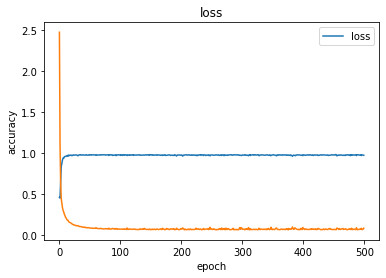

In [9]:
plt.plot(h.history['accuracy'])
 
plt.legend(['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
 
plt.plot(h.history['loss'])
plt.legend(['loss'])
plt.title('loss')
plt.xlabel('epoch')

In [10]:
def plot_decision_boundary(X, y, model):
    x_span = np.linspace(min(X[:,0]) - 1, max(X[:,0]) + 1)
    y_span = np.linspace(min(X[:,1]) - 1, max(X[:,1]) + 1)
    xx, yy = np.meshgrid(x_span, y_span)
    xx_, yy_ = xx.ravel(), yy.ravel()
    grid = np.c_[xx_, yy_]
    pred_func = model.predict(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)

prediction is:  [[0.9999968]]


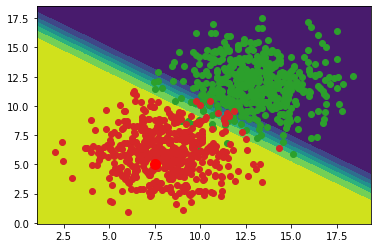

In [11]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])
 
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

x = 7.5
y = 5
 
 
point = np.array([[x, y]])
prediction = model.predict(point)
plt.plot([x], [y], marker='o', markersize=10, color="red")
print("prediction is: ",prediction)
